<a href="https://colab.research.google.com/github/SGRGit/gwOsc/blob/Main/DataPreprocessingImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
%matplotlib inline
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score

In [0]:
import os
base_dir = "drive/My Drive/Colab Notebooks/Other"
seta = 'George_W_Bush'
setb = 'Collin_Powell'

data_dir = os.path.join(base_dir, 'data')
seta_data_dir = os.path.join(data_dir, seta)
seta_data_fnnames = os.listdir(seta_data_dir)

setb_data_dir = os.path.join(data_dir, setb)
setb_data_fnnames = os.listdir(setb_data_dir)

In [0]:
import numpy as np
q1 = np.empty((1, 150, 150, 3))
q2 = np.empty((1, 150, 150, 3))
for a in range(1, len(seta_data_fnnames), 1):
  img_path_a = os.path.join(seta_data_dir, seta_data_fnnames[a])
  img_a = load_img(img_path_a, target_size = (150,150))
  q1 = np.vstack((q1, img_to_array(img_a).reshape(1, 150, 150, 3)))
  t1 = np.ones([len(seta_data_fnnames),1])
  
for b in range(1, len(setb_data_fnnames), 1):
  img_path_b = os.path.join(setb_data_dir, setb_data_fnnames[b])
  img_b = load_img(img_path_b, target_size = (150,150))
  q2 = np.vstack((q2, img_to_array(img_b).reshape(1, 150, 150, 3)))
  t2 = np.zeros([len(setb_data_fnnames),1])

In [0]:
t = np.vstack((t1, t2))

In [0]:
q = np.vstack((q1, q2))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(q, t, test_size=0.2)

In [0]:
datagen = ImageDataGenerator(
            rotation_range = 40,
            width_shift_range = 0.2,
            height_shift_range = 0.2,
            shear_range = 0.2,
            zoom_range = 0.2,
            horizontal_flip=True,
            fill_mode = 'nearest')

In [13]:
#Import Tensorflow Libraries
from tensorflow.keras import layers
from tensorflow.keras import Model

img_input = layers.Input(shape=(150, 150, 3))

# 2D Conv Layer with 64 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(64, 3, activation = 'relu')(img_input)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 128 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(128, 3, activation = 'relu')(x)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 256 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(256, 3, activation = 'relu')(x)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 512 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(512, 3, activation = 'relu')(x)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 512 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(512, 3, activation = 'relu')(x)
# Faltten Layer
x = layers.Flatten()(x)

# Fully Connected Layers and ReLU activation algoritm
x = layers.Dense(4096, activation = 'relu')(x)
x = layers.Dense(4096, activation = 'relu')(x)
x = layers.Dense(1000, activation = 'relu')(x)

# Dropout Layer for Optimization
x = layers.Dropout(0,noise_shape=None, seed=None)(x)

# Fully connected layers and sigmoid activation algorithm
output = layers.Dense(1, activation = 'sigmoid')(x)

model = Model(img_input, output)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 256)       0     

In [15]:
import tensorflow as tf
model.compile(loss = 'binary_crossentropy',
             optimizer = tf.train.AdamOptimizer(learning_rate = 0.0005),
             metrics = ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=2)

Train on 430 samples
Epoch 1/20
430/430 - 105s - loss: 2.5151 - acc: 0.6535
Epoch 2/20
430/430 - 101s - loss: 0.6627 - acc: 0.7000
Epoch 3/20
430/430 - 102s - loss: 0.6523 - acc: 0.7000
Epoch 4/20
430/430 - 101s - loss: 0.6250 - acc: 0.6953
Epoch 5/20
430/430 - 102s - loss: 0.6092 - acc: 0.7023
Epoch 6/20
430/430 - 102s - loss: 0.6508 - acc: 0.7023
Epoch 7/20
430/430 - 108s - loss: 0.6423 - acc: 0.7256
Epoch 8/20
430/430 - 107s - loss: 0.6036 - acc: 0.7186
Epoch 9/20
430/430 - 104s - loss: 0.4809 - acc: 0.7814
Epoch 10/20
430/430 - 107s - loss: 0.3845 - acc: 0.8186
Epoch 11/20
430/430 - 102s - loss: 0.3557 - acc: 0.8767
Epoch 12/20
430/430 - 105s - loss: 0.2656 - acc: 0.9023
Epoch 13/20
430/430 - 101s - loss: 0.1237 - acc: 0.9558
Epoch 14/20
430/430 - 102s - loss: 0.0716 - acc: 0.9721
Epoch 15/20
430/430 - 103s - loss: 0.2177 - acc: 0.9163
Epoch 16/20
430/430 - 102s - loss: 0.0732 - acc: 0.9744
Epoch 17/20
430/430 - 102s - loss: 0.1234 - acc: 0.9698
Epoch 18/20
430/430 - 106s - loss: 0

In [0]:
from sklearn.metrics import roc_curve
y_pred = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [0]:
from sklearn.metrics import auc
auc = auc(fpr, tpr)

In [21]:
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier

nsamples, nx, ny, nz = X_train.shape
nsamplesx, nxx, nyx, nzx = X_test.shape
train_dataset = X_train.reshape((nsamples,nx*ny*nz))
test_dataset = X_test.reshape((nsamplesx,nxx*nyx*nzx))

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(train_dataset, y_train)

y_pred_rf = rf.predict_proba(test_dataset)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


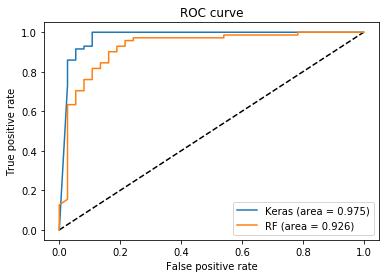

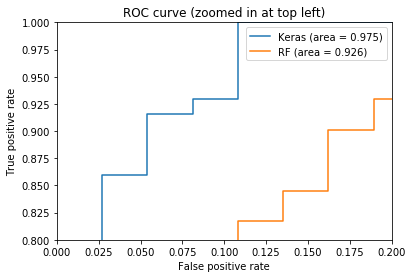

In [32]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()